In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [3]:
def standard_scale(X):
    res = (X - X.mean(axis = 0)) / X.std(axis = 0)
    return res

In [4]:
X_st = X.copy()
X_st[:, 1:] = standard_scale(X_st[:, 1:])
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [5]:
def calc_logloss(y, y_pred):
#     изменения
    y_pred[(1 - y_pred)<1e-15] -= 1e-15
    
    err = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
#     Первый комментарий был такой:
# "Если скармливать функции предсазание 0 или 1, после перехода от сигмоиды к ступенчатой функции, то
# ошибку естественней считать так:
#     err = np.mean(y-y_pred)
# Если же передаем функции значения y_pred = 1 / (1 + np.exp(-np.dot(X, w))), то y_pred не может быть равным 1,
# т.к. 1 не входит в область значений функции 1/(1+exp(-z))"
# Не совсем понимаю, почему он оказался не верным. Оличие значения функции 1/(1+exp(-z)) от 1 становится меньше,
# чем точность значения, которое выдает numpy?
    return err

In [6]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [7]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
#     W_list = []
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        errors.append(err)
        if i % (iterations / 10) == 0:
#             eta /= 1.1
            print(i, W, err)
    return W, errors

In [8]:
W, loss = eval_model(X_st, y, iterations=5000, eta=100)

0 [ -3.05320247 -27.22021581 -22.69498258 -10.92494778] 0.760958797591889
500 [  27.89641143  -67.47687025 -105.68738302  215.38541658] 1.9011448714695345
1000 [  40.89120131  -94.81509722 -157.76279657  314.36143941] 1.3641713451366304
1500 [  53.88798111 -122.14957128 -209.83870769  413.33099355] 0.8268853250178205
2000 [  68.80648911 -146.18233264 -255.29115752  491.6579508 ] 8.826929175286971e-05
2500 [  70.38656465 -146.64101338 -255.05259091  491.44933686] 1.4972621002435932e-05
3000 [  70.92026923 -146.80451841 -254.96730461  491.37900198] 8.282570108696317e-06
3500 [  71.24759223 -146.91233243 -254.91616761  491.33319429] 5.780782802912554e-06
4000 [  71.48298572 -146.99554436 -254.88023687  491.29826733] 4.4746385347607336e-06
4500 [  71.66609248 -147.06465439 -254.85277791  491.26965984] 3.673474318239859e-06


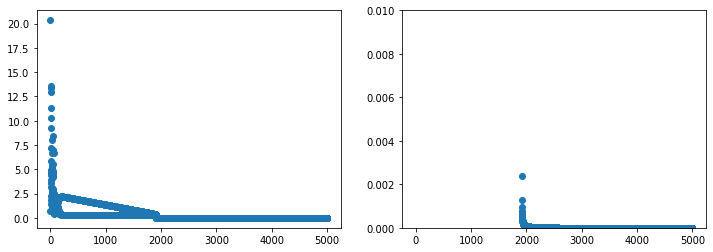

In [9]:
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.scatter(range(len(loss)), loss)

plt.subplot(122)
plt.scatter(range(len(loss)), loss)
plt.ylim(0, 0.01)

plt.show()

In [10]:
def calc_pred_proba(w, x):
    y_pred_proba = sigmoid(np.dot(x, w))
    return y_pred_proba

In [11]:
y_pred_proba = calc_pred_proba(W, X_st)
y_pred_proba

array([3.71621432e-007, 8.36847930e-053, 1.00000000e+000, 2.42537863e-120,
       9.99981136e-001, 4.89010189e-053, 1.00000000e+000, 1.66541526e-006,
       9.99989576e-001, 1.00000000e+000])

In [15]:
def calc_pred(w,x):
    a = sigmoid(np.dot(x, w))
    y_pred = np.zeros(a.shape[0])
    y_pred[a > 0.5] = 1
    y_pred[a <= 0.5] = 0
    return y_pred        

In [16]:
y_pred = calc_pred(W, X_st)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [17]:
def accuracy(y, y_pred):
    return 1-np.mean(1-(y - y_pred))

In [18]:
accuracy(y, y_pred)

0.0

In [19]:
def err_matrix(y, y_pred):
    TP = np.sum(y_pred[y==1])
    FP = np.sum(y_pred) - TP
    TN = np.sum(1 - y_pred[y==0])
    FN = np.sum(1 - y_pred) - TN
    return np.array([[TP, FP], [FN, TN]])

In [20]:
err_matrix(y, y_pred)

array([[5., 0.],
       [0., 5.]])

In [21]:
def presicion(y, y_pred):
    return np.sum(y_pred[y==1]) / np.sum(y_pred)

In [22]:
def recall(y, y_pred):
    return np.sum(y_pred[y==1]) / np.sum(y)

In [23]:
def F(y, y_pred):
    p = np.sum(y_pred[y==1]) / np.sum(y_pred)
    r = np.sum(y_pred[y==1]) / np.sum(y)
    res = 2 * p * r / (p + r)
    return res